In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Plotting training data
xd,yd = np.loadtxt('test.txt',unpack=True, delimiter=' ')
print(type(xd),xd)
print(yd)

<class 'numpy.ndarray'> [ 1.  1.  4. -2.  0.  2.]
[ 1.  -1.   5.   2.5  2.  -3. ]


In [2]:
#Sigma1
sigma1 = np.array([[.25,.3], [.3,1]]) 
detsigma1=np.linalg.det(sigma1)
print(sigma1)
print(detsigma1)

#Sigma=2
sigma2 = np.array([[.5,0], [0,.5]]) 
detsigma2=np.linalg.det(sigma2)
print(sigma2)
print(detsigma2)

[[0.25 0.3 ]
 [0.3  1.  ]]
0.15999999999999998
[[0.5 0. ]
 [0.  0.5]]
0.25


In [3]:
#mean
mu1=np.array([0, 0])
mu2=np.array([2, 2])

print(type(mu1), mu1)
print(mu2)

#Prior
prior1=0.5
prior2=0.5

<class 'numpy.ndarray'> [0 0]
[2 2]


In [4]:
#Data before classification
data = np.zeros((len(xd),2))
print(data,  data.shape, data.ndim)

for h in range(len(xd)):
    data[h][0]=xd[h]
    data[h][1]=yd[h]
print(data, type(data))       

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] (6, 2) 2
[[ 1.   1. ]
 [ 1.  -1. ]
 [ 4.   5. ]
 [-2.   2.5]
 [ 0.   2. ]
 [ 2.  -3. ]] <class 'numpy.ndarray'>


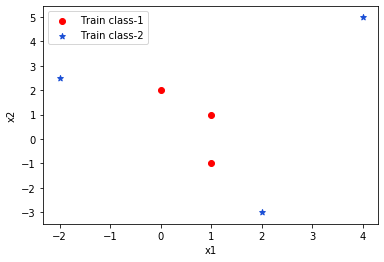

In [5]:
#classifying data
cl=[]
plt.xlabel('x1')
plt.ylabel('x2')
for i in range(len(xd)):
    for j in range(1,3):
        if j==1:
            g1 = -0.5*np.dot(np.dot((data[i,:]-mu1).T,np.linalg.inv(sigma1)),(data[i,:]-mu1))-np.log(2*np.pi)-0.5*np.log(np.linalg.det(sigma1))+np.log(prior1)
        elif j==2:
            g2 = -0.5*np.dot(np.dot((data[i,:,]-mu2).T,np.linalg.inv(sigma2)),(data[i,:]-mu2))-np.log(2*np.pi)-0.5*np.log(np.linalg.det(sigma2))+np.log(prior2)
    
    if g1>g2:
        xc1=plt.scatter(data[i,0], data[i,1], color='r')
        cl.append(1)
    else:
        xc2=plt.scatter(data[i,0], data[i,1], marker='*', color='#184DD5')
        cl.append(2)
plt.legend([xc1, xc2], ["Train class-1", "Train class-2"])
plt.show()

In [6]:
#data with class
datacl = np.zeros((len(xd),3))
print(datacl,  datacl.shape, datacl.ndim)

for h in range(len(xd)):
    datacl[h][0]=xd[h]
    datacl[h][1]=yd[h]
    datacl[h][2]=cl[h]
print(datacl, type(datacl))       


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] (6, 3) 2
[[ 1.   1.   1. ]
 [ 1.  -1.   1. ]
 [ 4.   5.   2. ]
 [-2.   2.5  2. ]
 [ 0.   2.   1. ]
 [ 2.  -3.   2. ]] <class 'numpy.ndarray'>


In [7]:
#seperating two class data
cl1 =[([ar[0],ar[1],ar[2]]) for ar in datacl if ar[2] == 1]
cl1 = np.array(cl1)
cl2 =[([ar[0],ar[1],ar[2]]) for ar in datacl if ar[2] == 2]
cl2 = np.array(cl2)
print(cl1)
print(cl2)

[[ 1.  1.  1.]
 [ 1. -1.  1.]
 [ 0.  2.  1.]]
[[ 4.   5.   2. ]
 [-2.   2.5  2. ]
 [ 2.  -3.   2. ]]


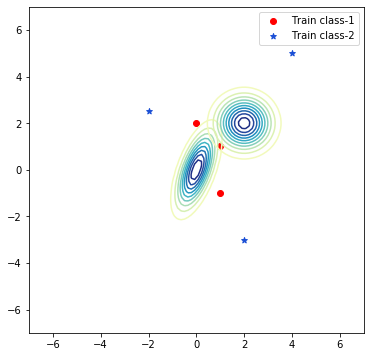

In [9]:
#contour plot with data
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


d=2

def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))


# Plot bivariate distribution
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 100 # grid size
    x1s = np.linspace(-7.0, 7, num=nb_of_x)
    x2s = np.linspace(-7.0, 7, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)



bivariate_mean = np.matrix([[0.], [0.]])  # Mean
bivariate_covariance = np.matrix([
    [0.25, 0.3], 
    [0.3, 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution


fig, ax = plt.subplots(figsize=(6,6))
d = 2 


ax.contour(x1, x2, p, 10, cmap=cm.YlGnBu)


bivariate_mean = np.matrix([[2.], [2.]])  # Mean
bivariate_covariance = np.matrix([
    [0.5, 0.], 
    [0., 0.5]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)

ax.contour(x1, x2, p, 10, cmap=cm.YlGnBu)



for i in range(len(xd)):    
    if datacl[i][2]==1:
        xc1=plt.scatter(data[i,0], data[i,1], color='r')
    else:
        xc2=plt.scatter(data[i,0], data[i,1], marker='*', color='#184DD5')
plt.legend([xc1, xc2], ["Train class-1", "Train class-2"])



#plt.show()
plt.show()

[[-7.         -6.5483871  -6.09677419 ...  6.09677419  6.5483871
   7.        ]
 [-7.         -6.5483871  -6.09677419 ...  6.09677419  6.5483871
   7.        ]
 [-7.         -6.5483871  -6.09677419 ...  6.09677419  6.5483871
   7.        ]
 ...
 [-7.         -6.5483871  -6.09677419 ...  6.09677419  6.5483871
   7.        ]
 [-7.         -6.5483871  -6.09677419 ...  6.09677419  6.5483871
   7.        ]
 [-7.         -6.5483871  -6.09677419 ...  6.09677419  6.5483871
   7.        ]]
2
[[199.0625     172.67592352 148.83877471 ... 468.91941988 516.4662461
  566.5625    ]
 [201.35698491 174.20558012 149.60360302 ... 449.03388398 495.81588189
  545.14730749]
 [204.28882674 176.37259365 151.00578824 ... 429.78570499 475.80287461
  524.3694719 ]
 ...
 [524.3694719  475.80287461 429.78570499 ... 151.00578824 176.37259365
  204.28882674]
 [545.14730749 495.81588189 449.03388398 ... 149.60360302 174.20558012
  201.35698491]
 [566.5625     516.4662461  468.91941988 ... 148.83877471 172.67592352
  

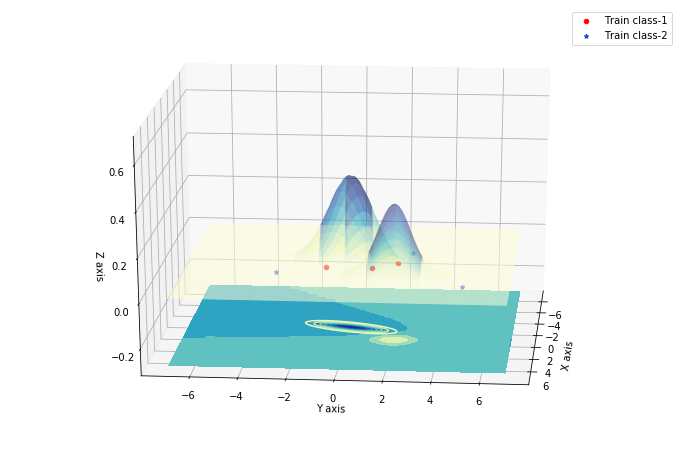

In [10]:
#3d plot
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Our 2-dimensional distribution will be over variables X and Y
N = 32
X = np.linspace(-7, 7, N)
Y = np.linspace(-7, 7, N)
X, Y = np.meshgrid(X, Y)


# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ .25 , 0.3], [.3,  1.]])
mu1 = np.array([2.,2.])
Sigma1 = np.array([[ .5 , 0.], [0.,  .5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
print(X)

def multivariate_gaussiandb(pos, mu, Sigma):
    n = mu.shape[0]
    print(n)
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
     # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    print(fac)
    return np.exp(-fac / 2) / N

Z = multivariate_gaussiandb(pos, mu, Sigma)
print(mu.shape[0])
Z1 = multivariate_gaussiandb(pos, mu1, Sigma1)
# Create a surface plot and projected filled contour plot under it.
db=Z-Z1


# Create grid and multivariate normal
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))


# Plot bivariate distribution
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 100 # grid size
    x1s = np.linspace(-7.0, 7, num=nb_of_x)
    x2s = np.linspace(-7.0, 7, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)
# Make a 3D plot
fig = plt.figure(figsize=[12,8])

ax = fig.add_subplot(111, projection='3d')
d = 2 



bivariate_mean = np.matrix([[0.], [0.]])  # Mean
bivariate_covariance = np.matrix([
    [0.25, 0.3], 
    [0.3, 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
#ax.contourf(x1, x2, p, 100, alpha=0.4,  cmap=cm.YlGnBu)
surf = ax.plot_surface(x1, x2, p, rstride=8, cstride=1,alpha=0.4, cmap=cm.YlGnBu)
cset = ax.contour(x1, x2, p,offset=-0.3, cmap=cm.YlGnBu)


bivariate_mean = np.matrix([[2.], [2.]])  # Mean
bivariate_covariance = np.matrix([
    [0.5, 0.], 
    [0., 0.5]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)

surf = ax.plot_surface(x1, x2, p, rstride=8, cstride=1, alpha=0.3, cmap=cm.YlGnBu)
cset = ax.contourf(X, Y, db, zdir='z', offset=-0.3, cmap=cm.YlGnBu)




for i in range(len(xd)):    
    if datacl[i][2]==1:
        xc1=ax.scatter(data[i,0], data[i,1], color='r')
    else:
        xc2=ax.scatter(data[i,0], data[i,1], marker='*', color='#184DD5')
plt.legend([xc1, xc2], ["Train class-1", "Train class-2"])



ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlim(-0.3, 0.7)
ax.set_zlabel('Z axis')
ax.view_init(elev=20, azim=5)
plt.show()